# Quick check BL 6.3.1

for quick checks of XMCD/XLD and hysteresis loops, 

if you want to use this notebook, please work in a copy

- get recent update of [xaspy](https://github.com/gnzng/xaspy), restart kernel after update, or set xaspy to specific version
- make sure to use cell magic by adding the "%" in front

In [9]:
#%pip install xaspy -U
#%pip install xaspy==0.2.1

- get the version number of the module

In [2]:
import xaspy 
print(xaspy.info())

xaspy
2022-03-10
0.2.1
Damian Guenzing | Facaulty of Physics | Universtity of Duisburg-Essen


import important modules:

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

#from xaspy.xas import xas,XMCD,mHYST,linprebkg,smooth,backgrounds
from xaspy.xas import xas,backgrounds
from xaspy.xas.polarized import XMCD,mHYST
from xaspy.xas.backgrounds import smooth

## import function for files

e.g. 
for Trajectory Scans:

`TrajScan('30261_0003').df` for pandas dataframe (df)

In [20]:
try: 
    # will be implemented from version 0.2.2, if used on beam line computer use the data path below, also 
    # also adjust to filepaths to OS 
    from xaspy.readin.bl631 import TrajScan, SigScan 
except:
    class TrajScan:
        def __init__(self,string):
            datapath = "Y:\\BCS Setup Data\\"
            for n in os.listdir(datapath):
                try:
                    files   = datapath + "{}".format(n) + "\\TrajScan" + string + ".txt"
                    
                    
                    t1      = pd.read_csv(files, skiprows=9,sep='\t',engine='python')
                    self.df = t1
                except:
                    pass
        
                
    class SigScan:
        def __init__(self,string):
            datapath = "Y:\\BCS Setup Data\\"
            for n in os.listdir(datapath):
                try:
                    files   = datapath + "{}".format(n) + "\\SigScan" + string + ".txt"
                    f = open(files)
                    ct = 0
                    for n in range(50):
                        line = str(f.readline())
                        if line.startswith("Time of Day"):
                            break
                        ct += 1
                    t1      = pd.read_csv(files, skiprows=ct-1,sep='\t',engine='python')
                    self.df = t1
                    f.close()
                except:
                    pass

In [18]:
from datetime import datetime  

In [21]:
fails = []
print("failed import for Sig, with counting to Time of Day:")

dt1 = datetime.now()
for n in tqdm(test_list_SigScan[:]):
    try:
        SigScan(n).df
    except:
        fails.append(n)
        
print(len(fails))
print("time needed: ", datetime.now()-dt1)

failed import for Sig, with counting to Time of Day:


100%|██████████████████████████████████████████████████████████████████████████████| 3456/3456 [10:18<00:00,  5.59it/s]


39
time needed:  0:10:18.327238


In [13]:
fails

['54568-Av',
 '54569-Av',
 '54570-Av',
 '54571-Av',
 '54572-Av',
 '54573-Av',
 '54574-Av',
 '54575-Av',
 '54576-Av',
 '54578-Av',
 '54579-Av',
 '54580-Av',
 '54581-Av',
 '54582-Av',
 '54583-Av',
 '54584-Av',
 '54585-Av',
 '54586-Av',
 '54587-Av',
 '54603-Av',
 '54604-Av',
 '54605-Av',
 '54606-Av',
 '54607-Av',
 '54608-Av',
 '54609-Av',
 '54610-Av',
 '54611-Av',
 '54612-Av',
 '54613-Av',
 '54614-Av',
 '54615-Av',
 '54616-Av',
 '54617-Av',
 '54618-Av',
 '54619-Av',
 '54620-Av',
 '54621-Av',
 '54622-Av']

In [17]:

file = "Y:\\BCS Setup Data\\220703\\TrajScan31958-001_0001.txt"

f = open(file)
ct = 0
for n in range(50):
    line = str(f.readline())
    if line.startswith("Time of Day"):
        break
    ct += 1
print(ct-1)

9


## spectra quick check

- use cell magic "matplotlib inline" for static plots and "matplotlib widget" for interactive plots

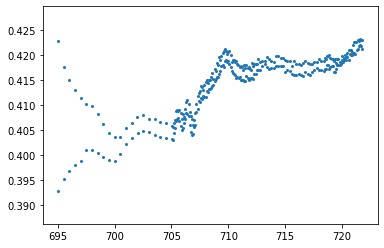

In [15]:
%matplotlib inline

df = TrajScan('31920').df
#df = SigScan('52877').df

plt.scatter(df["Energy"], df["EY"]/df["Clock"],s=4)

#print(df["Z"])

## XMCD quick check

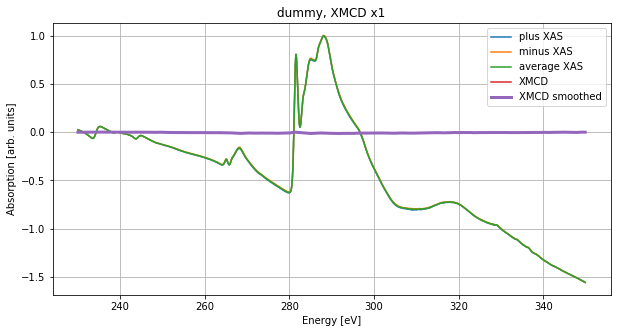

In [30]:
%matplotlib inline
main_nr1 = 31925 #

#tomerge = [
#    '{}'.format(main_nr1),
   # '{}_0002'.format(main_nr1),
   # '{}_0003'.format(main_nr1),
#    '{}_0004'.format(main_nr1),
#    '{}_0005'.format(main_nr1),
 #   '{}_0006'.format(main_nr1),
  #  '{}_0007'.format(main_nr1),
  #  '{}_0008'.format(main_nr1),
#]


tomerge = ['{}_{:04}'.format(main_nr1, n) for n in range(33,42)]

#set to True if zou want to plot the individual pairs
showall = False

plist = []
mlist = []

for n in tomerge:
    t1 = TrajScan(n).df
    # dividing the scan files by magnetic field direction
    plus = t1[t1['Magnet Field'] <= 0].reset_index()
    minus= t1[t1['Magnet Field'] >= 0].reset_index()

    plist.append(plus)
    mlist.append(minus)


# finally feed everything in the XMCD function        
xx, pxas, mxas, xas, xmcd = XMCD(plist,mlist,'Energy','EY','Clock',log=False,
                                 norm='white_line',xsize=10000)




xmcd_scaling = 1
sample = "dummy"
    
############################# OUTPUT
plt.figure(figsize=(10,5))
plt.title("{}, {}".format(sample,"XMCD x"+str(xmcd_scaling)))
plt.plot(xx, pxas,label='plus XAS')
plt.plot(xx, mxas,label='minus XAS')
plt.plot(xx, xas ,label='average XAS')
plt.plot(xx, xmcd*xmcd_scaling ,label='XMCD')
plt.plot(xx, smooth(xmcd,100)*xmcd_scaling ,label='XMCD smoothed',linewidth=3)

if showall:
    for i in range(len(plist)):
        xxi, pxasi, mxasi, xasi, xmcdi = XMCD([plist[i],], [mlist[i],],'Energy','EY','Clock',log=False,
                                              norm='white_line',xsize=10000)
#        plt.plot(xxi, xasi,label='XAS #{}'.format(i+1),alpha=0.2)
        plt.plot(xxi, xmcdi*xmcd_scaling,label='XMCD x{} #{}'.format(xmcd_scaling, i+1),alpha=0.2)

plt.xlabel('Energy [eV]')
plt.ylabel('Absorption [arb. units]')
plt.legend()
plt.grid()
plt.show()


## XLD quick check

In [ ]:

main_nr1 = 30521 # 
 

l1_minus =    TrajScan('{}-001_0001'.format(main_nr1)).df
l1_zero  =    TrajScan('{}-001_0002'.format(main_nr1)).df
l1_plus  =    TrajScan('{}-001_0004'.format(main_nr1)).df

l2_minus =    TrajScan('{}-001_0009'.format(main_nr1)).df
l2_zero  =    TrajScan('{}-001_0011'.format(main_nr1)).df
l2_plus  =    TrajScan('{}-001_0012'.format(main_nr1)).df

for n in [l1_minus,l1_zero,l1_plus,l2_minus,l2_zero,l2_plus]:
    normalize(n)

plt.figure(figsize=(10,10))

#plt.plot(l1_minus['Energy'],l1_minus['norm'],label = "minus 0dg") 
#plt.plot(l1_zero['Energy'],l1_zero['norm'],label = "zero 0dg") 
#plt.plot(l1_plus['Energy'],l1_plus['norm'],label = "plus 0dg") 
#
#
#plt.plot(l2_minus['Energy'],l2_minus['norm'],label = "minus 60dg") 
#plt.plot(l2_zero['Energy'],l2_zero['norm'],label = "zero 60dg") 
#plt.plot(l2_plus['Energy'],l2_plus['norm'],label = "plus 60dg") 


plt.plot(l1_plus['Energy'],l1_zero['normMn_max'], label = "1") 
plt.plot(l2_plus['Energy'],l2_zero['normMn_max'], label = '2') 
#plt.plot(l2_zero['Energy'],l2_zero['norm'], label = "1") 
#plt.plot(l1_zero['Energy'],l1_zero['norm'], label = '2') 
plt.plot(l1_plus['Energy'],(l2_zero['normMn_max']-l1_zero['normMn_max'])*10, label = "diff") 

plt.grid()
plt.legend()

## Hysteresis

suggested ene_cut: 786.5 [eV]


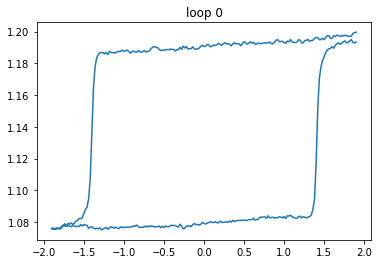

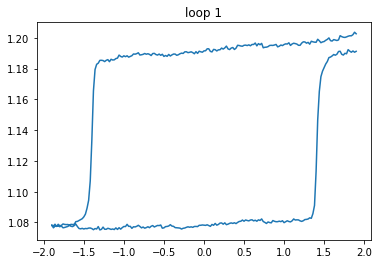

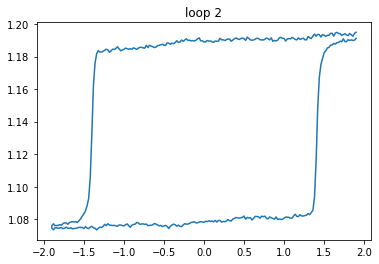

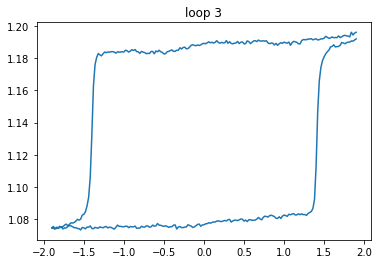

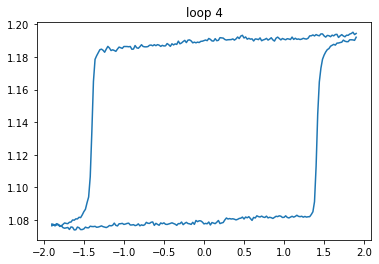

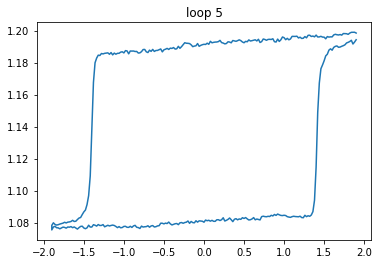

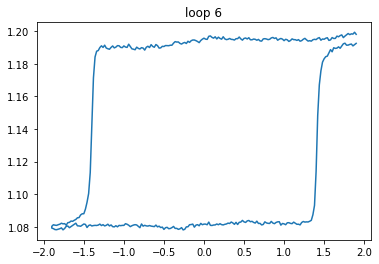

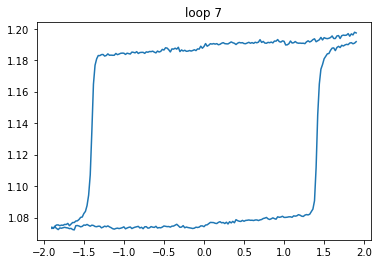

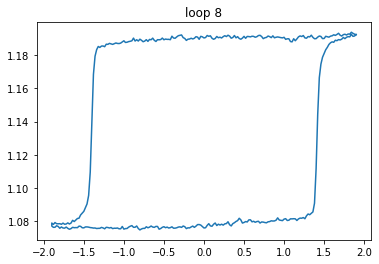

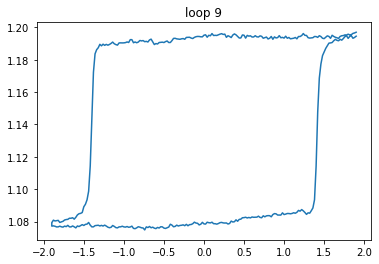

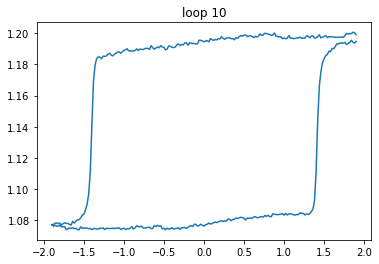

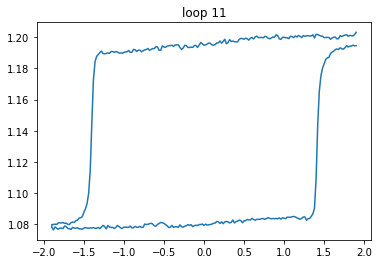

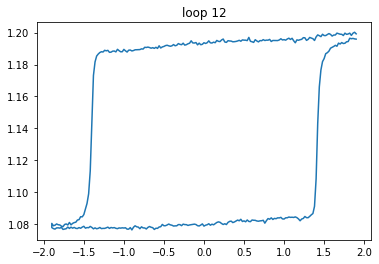

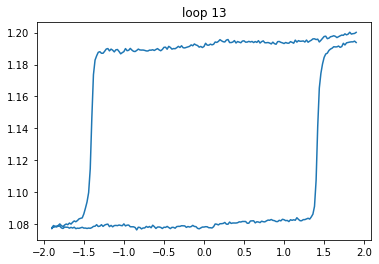

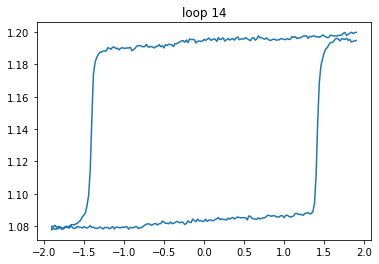

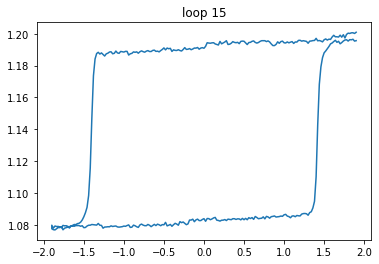

averaged loops:


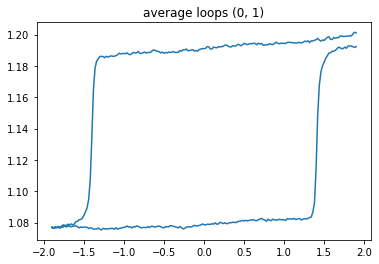

In [22]:
## choose TrajScan file here as a string
scannumber = '31914-001_0001'
df = TrajScan(scannumber).df

sug_ene_cut = np.around((np.max(df['Energy']) - np.min(df['Energy']))/2 + np.min(df['Energy']),2)
print("suggested ene_cut: {} [eV]".format(sug_ene_cut))


# adjust energy column, detector and monitor column. ene_cut: energy between the edges
hystclass = mHYST(df,'Energy','LY','Clock',ene_cut = sug_ene_cut,ratio='higher/lower')
hystclass.plot_seperated()

# now average specific loops
    # return_data = Talse for plotting 
    # return_data = True for data as tuple for further plotting or saving
    
print('averaged loops:')
hystclass.average_loops([0,1],return_data = False)

# Preparing scn file

prepare scan files for example spectra mapping:

In [ ]:
#values in mm

z_start, z_end = 95.0, 99.0
y_start, y_end = -6.0, -1.0
stepsize       = 0.15

z_steps        = (z_end - z_start)/stepsize + 1
y_steps        = (y_end - y_start)/stepsize + 1

f = open("damian_Fe_spec_mapping.scn","w")

counter = 1 
f.write("Flying Energy (693, 735, 0.1, 1)\n")
f.write("Z\tY\n")
f.write("\n")
for i in np.linspace(z_start, z_end,num = z_steps):
    for j in np.linspace(y_start, y_end,num = y_steps):
        f.write("{}\t{}\tflying(697, 725, 0.1, 1)\n".format(np.around(i,3),np.around(j,3)))
        f.write("#scan number _{:04}\n".format(counter))
        f.write("file\n")
        f.write("\n")
        counter +=1

f.close()